In [4]:
!python -m pip install --upgrade pip setuptools wheel
!python -m pip install pandas 
!python -m pip install scikit-learn
!python -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Importing Library   


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('nasdaq100.csv',sep=';')
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [7]:
#to check null value
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [8]:
#df.drop('Column_name',axis=1,inplace=True)  #to drop a column
df=df.drop(columns=["Date"])
df.head()


,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


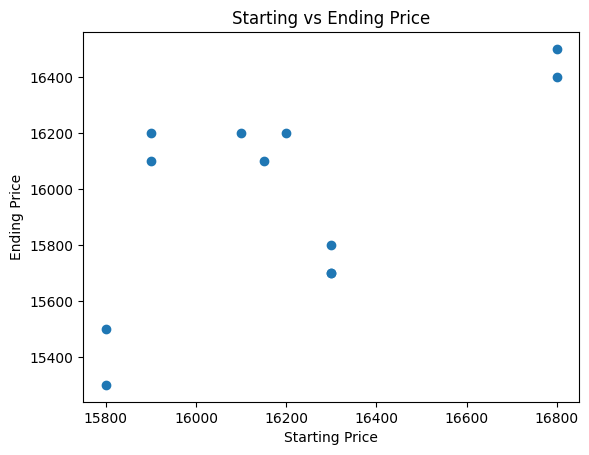

In [9]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting Price')
plt.ylabel('Ending Price')
plt.title('Starting vs Ending Price')
plt.show()

In [10]:
x=df.drop(columns=['Ending (USD)'],axis=1)

x.head()


,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [11]:
y=df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [12]:
#forming y=mx+c equation
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [13]:
x.mean()


Starting (USD)    16195.833333
dtype: float64

In [14]:
y.mean()

Ending (USD)    15975.0
dtype: float64

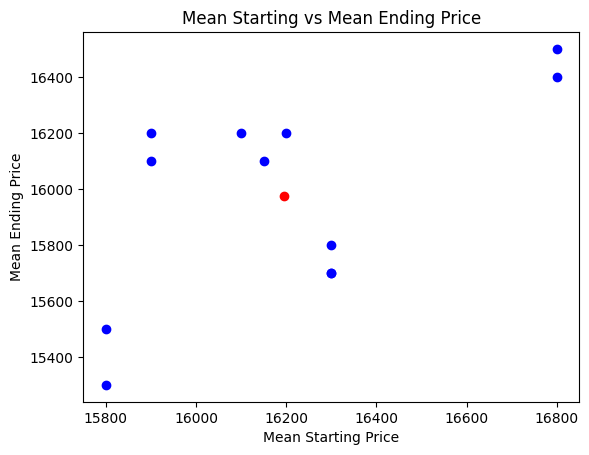

In [ ]:
plt.scatter(x.mean(),y.mean(),color='red')#best fit line will pass through this point coz mean of x and y
plt.scatter(df['Starting (USD)'],df['Ending (USD)'],color='blue')
plt.xlabel('Mean Starting Price')
plt.ylabel('Mean Ending Price')
plt.title('Mean Starting vs Mean Ending Price')
plt.show()

In [17]:
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


m=model.coef_

In [19]:
m=model.coef_
m

array([[0.65258293]])

In [20]:
c=model.intercept_
c

array([5405.87555702])

In [21]:
#applying the values in the equation y=mx+c
predicted_y=m*200 + c
predicted_y

array([[5536.39214392]])

In [22]:
model.predict([[200]])

C:\Users\mahmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5536.39214392]])

In [23]:
df['Predicted Y Ending (USD)']=model.predict(x)
df.head()

,Starting (USD),Ending (USD),Predicted Y Ending (USD)
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


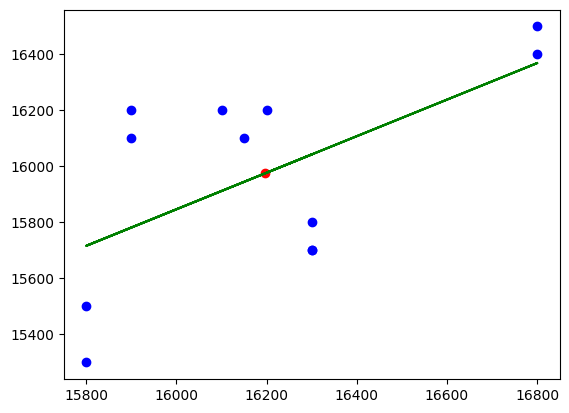

In [31]:
plt.plot(x,df['Predicted Y Ending (USD)'],color='green')
plt.scatter(x.mean(),y.mean(),color='red')#best fit line will pass through this point coz mean of x and y
plt.scatter(df['Starting (USD)'],df['Ending (USD)'],color='blue')

plt.show()  

Loss and Cost Functions


In [32]:
#loss calculation
df['loss']=df['Ending (USD)'] - df['Predicted Y Ending (USD)']
df.head()

,Starting (USD),Ending (USD),Predicted Y Ending (USD),loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [34]:
#to remove negative loss values we use absolute function MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(df['Ending (USD)'],df['Predicted Y Ending (USD)'])
mae

260.3840017604666

In [35]:
mse=mean_squared_error(df['Ending (USD)'],df['Predicted Y Ending (USD)'])
mse

80411.23397700385

In [36]:
model.score(x,y)

0.3577804940272571